# RQ5: Can we effectively measure creativity using Boden’s framework in the context of AI- generated texts?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import copy
import numpy as np
import matplotlib

# Configurar la fuente de toda la figura en Times New Roman
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Times New Roman'

In [2]:
df = pd.read_csv('data/expert_assessment.csv')

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
from scipy.stats import gaussian_kde

# Crear un dataframe similar a 'both' con columnas 'EmployeeType', 'team_work', 'tools_needed' con datos discretos tipo likert
np.random.seed(0)

def plot_scatter_with_dynamic_jitter(df, key_x, key_y, group_x_y, legend):
    df = copy.deepcopy(df)

    # Calcular la densidad de puntos
    xy = np.vstack([df[key_x], df[key_y]])
    z = gaussian_kde(xy)(xy)
    df['density'] = z

    # Normalizar la densidad para ajustar el jitter
    norm_density = (df['density'] - df['density'].min()) / (df['density'].max() - df['density'].min())
    jitter_strength = norm_density * 0.3  # Ajustar la fuerza del jitter

    # Añadir jitter basado en la densidad
    df[key_x] = df[key_x] + np.random.uniform(-jitter_strength, jitter_strength, df.shape[0])
    df[key_y] = df[key_y] + np.random.uniform(-jitter_strength, jitter_strength, df.shape[0])

    # Crear el scatter plot con jitter dinámico
    plt.figure(figsize=(8, 5))
    scatter_plot = sns.scatterplot(data=df, 
                    x=key_x, 
                    y=key_y, 
                    #hue=group_x_y, 
                    #size='density', 
                    #palette='viridis', 
                    markers=["o", "s"],  # Cambiar los marcadores
                    alpha=0.7, 
                    edgecolor='black', 
                    linewidth=0.5)
    
    plt.xlabel(key_x, fontsize=14)
    plt.ylabel(key_y, fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.gca().set_aspect('equal', adjustable='box')

    # Ajustar los límites de los ejes
    plt.xlim(-0.5, 3.5)
    plt.ylim(-0.5, 3.5)
    plt.xticks(range(0, 4), fontsize=12)
    plt.yticks(range(0, 4), fontsize=12)
    if legend:
        plt.legend(title='Writer', title_fontsize='12', fontsize='10', loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3)
    
    plt.margins(x=0, y=0)
    plt.tight_layout(pad=0.5)
    plt.savefig(f'figures/RQ5_{key_x}_{key_y}_dynamic_jitter.pdf', bbox_inches='tight', pad_inches=0.1)
    plt.show()


In [4]:
new_df = pd.DataFrame()
new_df['Attractive'] = df['1_attractive_style'].tolist() + df['1_attractive_theme'].to_list()
new_df['Originality'] = df['2_originality_style'].tolist() + df['2_originality_theme'].to_list()
new_df['Creativity'] = df['4_creativity_synopsis'].tolist() + df['4_creativity_synopsis'].to_list()
new_df['synopsis_writer'] = df['synopsis_writer'].tolist() + df['synopsis_writer'].tolist()
map_writer = {'gpt4_es' : 'GPT4 in Spanish', 'gpt4_en':'GPT4 in English', 'patricio':'Professional Writer'}
new_df['synopsis_writer'] = new_df['synopsis_writer'].apply(lambda x: map_writer[x])
new_df

,Attractive,Originality,Creativity,synopsis_writer
0,2,2,1,GPT4 in English
1,0,0,0,GPT4 in English
2,0,0,0,GPT4 in English
3,0,0,1,GPT4 in English
4,0,0,0,GPT4 in English
...,...,...,...,...
1435,1,2,3,Professional Writer
1436,2,3,3,Professional Writer
1437,2,2,2,Professional Writer
1438,2,1,1,Professional Writer


In [5]:
new_df[['Attractive','Originality','Creativity']].corr(method='spearman')

,Attractive,Originality,Creativity
Attractive,1.000000,0.778496,0.717594
Originality,0.778496,1.000000,0.729353
Creativity,0.717594,0.729353,1.000000


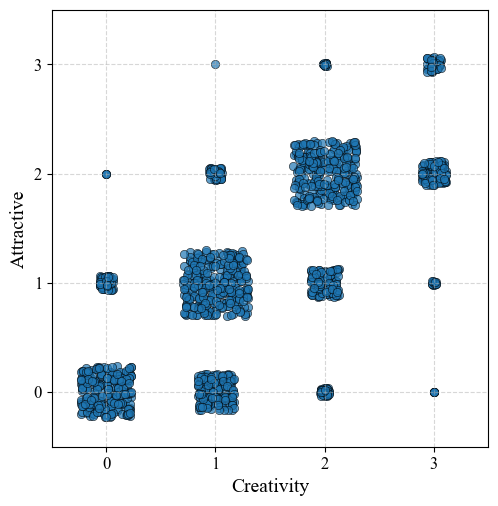

In [6]:
plot_scatter_with_dynamic_jitter(new_df, 'Creativity', 'Attractive', 'synopsis_writer', legend=False)

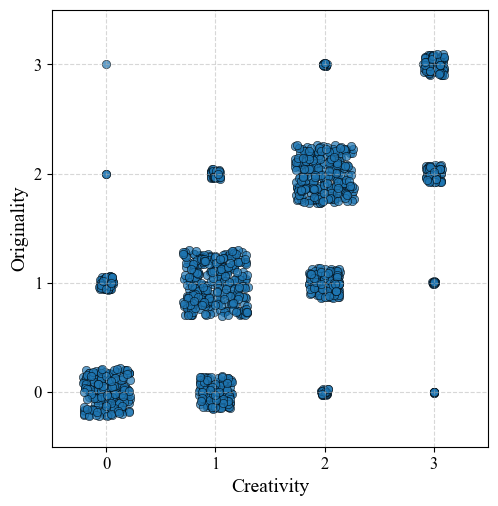

In [7]:
plot_scatter_with_dynamic_jitter(new_df, 'Creativity', 'Originality', 'synopsis_writer', legend=False)